# Alexander Knight

## Assignment 2

## I-Lab II

## Spring 2016

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline

from matplotlib import rc

#defines needed functions

def gaussianFit (x, a, c, theta):
    return a*np.e**(-(x-c)**2/(2*theta**2))

def linearFit(t, m, b):
    return m*t + b

def quadraticFit(t, a, b, c):
    return a*(t**2)+(b*t)+c

def cosFit(t, a, omega, c):
    return a*np.cos(omega*(t-c))

#calls data file and creates an array
data = np.genfromtxt("002data.txt", skip_header=1)

In [111]:
#defines points into arrays
x = data[:,0]
z = data[:,1]
u = data[:,2]
v = data[:,3]
y = data[:,4]
e = data[:,5]

## 1.

[ 2.92592864  0.73869777]
[[ 0.00440717 -0.00663102]
 [-0.00663102  0.01357327]]


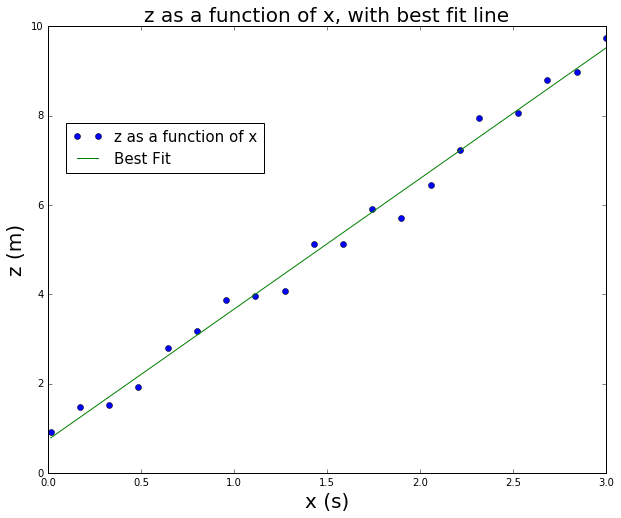

In [190]:
fitParamsLin, fitCovariancesLin = curve_fit(linearFit, x, z)
print(fitParamsLin)
print(fitCovariancesLin)

plt.figure(figsize=(10,8))
plt.plot(x, z, 'o', label="z as a function of x")
plt.plot(x, linearFit(x, fitParamsLin[0], fitParamsLin[1]), label="Best Fit")
plt.xlabel("x (s)", fontsize="20")
plt.ylabel("z (m)",fontsize="20")
plt.title("z as a function of x, with best fit line", fontsize="20")
plt.legend(bbox_to_anchor=(0.4,0.8), fontsize="15")
plt.show()

Above, we determine the best fit constants to that give us our best fit line, and plot both the points and the best fit line.

## 2. a)

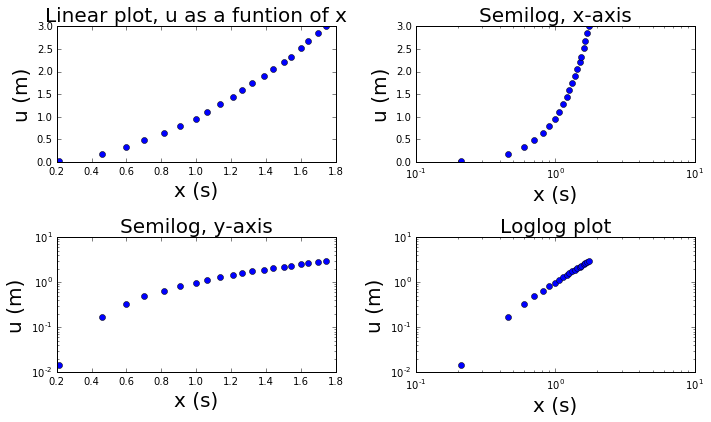

In [184]:
plt.figure(figsize = (10,6))
plt.subplot(2, 2, 1)
plt.title("Linear plot, u as a funtion of x", fontsize="20")
plt.plot(u,x, 'o')
plt.xlabel("x (s)", fontsize="20")
plt.ylabel("u (m)", fontsize="20")


plt.subplot(2, 2, 2)
plt.title("Semilog, x-axis", fontsize="20")
plt.semilogx(u,x, 'o')
plt.xlabel("x (s)", fontsize="20")
plt.ylabel("u (m)", fontsize="20")


plt.subplot(2, 2, 3)
plt.title("Semilog, y-axis", fontsize="20")
plt.semilogy(u,x, 'o')
plt.xlabel("x (s)", fontsize="20")
plt.ylabel("u (m)", fontsize="20")


plt.subplot(2, 2, 4)
plt.title("Loglog plot", fontsize="20")
plt.loglog(u,x, 'o')
plt.xlabel("x (s)", fontsize="20")
plt.ylabel("u (m)", fontsize="20")

plt.tight_layout()
plt.show()

When we plot u as a function of x in linear, semi-log, and log-log plots, we can see it is linear in the log-log plot. This means the that 
$u \propto x^\alpha$, with $\alpha$ being a constant. The steeper the slope on the log-log plot, the larger the value of $\alpha$.

## 2. b)

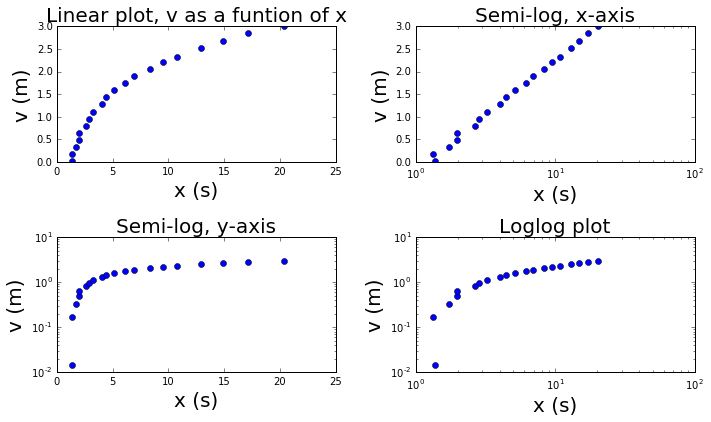

In [194]:
plt.figure(figsize = (10,6))

plt.subplot(2, 2, 1)
plt.title("Linear plot, v as a funtion of x", fontsize="20")
plt.plot(v,x, 'o')
plt.xlabel("x (s)", fontsize="20")
plt.ylabel("v (m)", fontsize="20")


plt.subplot(2, 2, 2)
plt.title("Semi-log, x-axis", fontsize="20")
plt.semilogx(v,x, 'o')
plt.xlabel("x (s)", fontsize="20")
plt.ylabel("v (m)", fontsize="20")


plt.subplot(2, 2, 3)
plt.title("Semi-log, y-axis", fontsize="20")
plt.semilogy(v,x, 'o')
plt.xlabel("x (s)", fontsize="20")
plt.ylabel("v (m)", fontsize="20")


plt.subplot(2, 2, 4)
plt.title("Loglog plot", fontsize="20")
plt.loglog(v,x, 'o')
plt.xlabel("x (s)", fontsize="20")
plt.ylabel("v (m)", fontsize="20")
plt.tight_layout()
plt.show()

When we plot v as function of x on linear plot, semi-log plots, and log-log plots, you can see it is linear on the semi-log plot, x-axis. This tells us that $ v \propto \lambda ^{\theta x}$, with $\lambda$ and $\theta$ being some constants.

## 3.

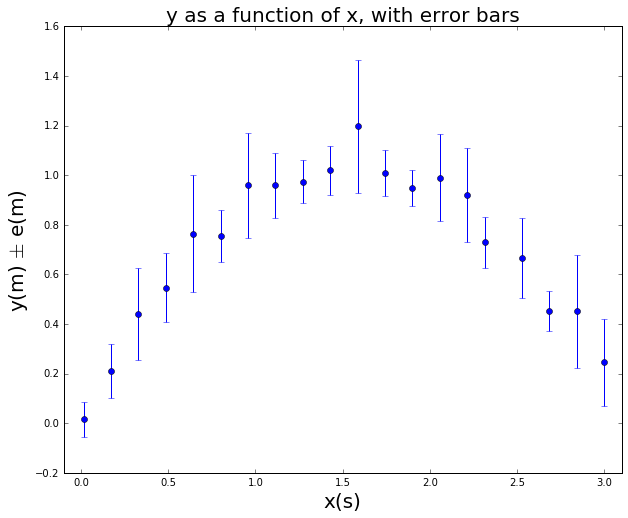

In [115]:
plt.figure(figsize=(10,8))
plt.title("y as a function of x, with error bars", fontsize="20")
plt.errorbar(x, y, yerr=e, fmt = 'o')
plt.xlabel("x(s)", fontsize= "20")
plt.xlim([-0.1, 3.1])
plt.ylabel("y(m) $\pm$ e(m)", fontsize='20')
plt.show()

## 4.

[-0.41725866  1.3126319   0.02259448]
[[ 0.0003711  -0.00111712  0.00053789]
 [-0.00111712  0.00360652 -0.00198586]
 [ 0.00053789 -0.00198586  0.00153018]]
[ 0.05779194  0.18016298  0.11735237]


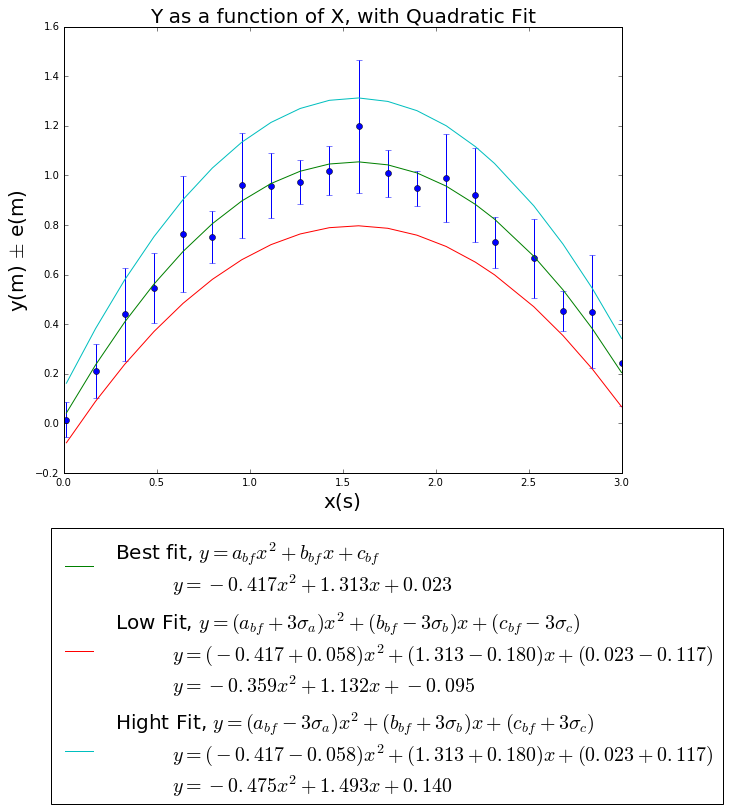

In [193]:
fitParamsQuad, fitCovariancesQuad = curve_fit(quadraticFit, x, y)
print(fitParamsQuad)
print(fitCovariancesQuad)

sigmaQuad =  3*np.sqrt([fitCovariancesQuad[0,0], fitCovariancesQuad[1,1], fitCovariancesQuad[2,2]])
print (sigmaQuad)

plt.figure(figsize=(10,8))
plt.title("Y as a function of X, with Quadratic Fit", fontsize="20")
plt.ylabel("y(m) $\pm$ e(m)", fontsize="20")
plt.xlabel("x(s)", fontsize="20")
plt.errorbar(x,y, yerr=e, fmt='o')
plt.plot(x, quadraticFit(x, fitParamsQuad[0], fitParamsQuad[1], fitParamsQuad[2]), \
         label="Best fit, $y = a_{bf} x^2 + b_{bf} x + c_{bf}$ \n \
        $y= %0.3f x^2 + %0.3f x + %0.3f$"% (fitParamsQuad[0], fitParamsQuad[1], fitParamsQuad[2]))
plt.plot(x, quadraticFit(x, fitParamsQuad[0]+sigmaQuad[0], fitParamsQuad[1]-sigmaQuad[1], fitParamsQuad[2]-sigmaQuad[2]), \
         label="Low Fit, $y= (a_{bf}+ 3 \sigma_a) x^2 + (b_{bf}-3 \sigma_b) x + (c_{bf} - 3 \sigma_c)$ \n \
        $y = (%0.3f + %0.3f)x^2 + (%0.3f - %0.3f)x + (%0.3f-%0.3f)$ \n \
        $y = %0.3f x^2 + %0.3f x + %0.3f$" % (fitParamsQuad[0], sigmaQuad[0], fitParamsQuad[1], sigmaQuad[1], fitParamsQuad[2], sigmaQuad[2], \
                                           fitParamsQuad[0]+sigmaQuad[0], fitParamsQuad[1]-sigmaQuad[1], fitParamsQuad[2]-sigmaQuad[2]))
plt.plot(x, quadraticFit(x, fitParamsQuad[0]-sigmaQuad[0], fitParamsQuad[1]+sigmaQuad[1], fitParamsQuad[2]+sigmaQuad[2]),\
         label="Hight Fit, $y = (a_{bf}- 3 \sigma_a) x^2 + (b_{bf}+3 \sigma_b) x + (c_{bf} + 3 \sigma_c)$ \n \
        $y = (%0.3f - %0.3f)x^2 + (%0.3f + %0.3f)x + (%0.3f+%0.3f)$ \n \
        $y = %0.3f x^2 + %0.3f x + %0.3f$" % (fitParamsQuad[0], sigmaQuad[0], fitParamsQuad[1], sigmaQuad[1], fitParamsQuad[2], sigmaQuad[2], \
                                           fitParamsQuad[0]-sigmaQuad[0], fitParamsQuad[1]+sigmaQuad[1], fitParamsQuad[2]+sigmaQuad[2]))
plt.legend(bbox_to_anchor=(1.2, -0.1), fontsize = '20')
plt.show()

In the plot above, you can see the plot of the individual points with error bars, best fit line, and high and low lines. The high and low lines were determined using three standard deviations for each of the constants. These standard deviations were determined by the curve_fit function. This function used statistical black magic to determine the covariances for each of the constants.

## 5. a)

In [199]:
fitParamsGauss, fitCovariancesGauss = curve_fit(gaussianFit, x, y)
print(fitParamsGauss)
print(fitCovariancesGauss)

sigmaGauss = 3* np.sqrt([fitCovariancesGauss[0,0], fitCovariancesGauss[1,1], fitCovariancesGauss[2,2]])
print(sigmaGauss)

[ 1.10721112  1.57239239  0.87295933]
[[  1.31089085e-03  -3.30561399e-05  -8.56876108e-04]
 [ -3.30561399e-05   1.11606236e-03   6.74304904e-05]
 [ -8.56876108e-04   6.74304904e-05   1.48324147e-03]]
[ 0.10861868  0.10022256  0.11553862]


Above we have determined the best fit constants for the "y as a function of x" assuming a gaussian function. We see that:

$y = 1.11e^{-\frac{(x-1.57)^2}{2*0.873^2}}$


Below, I also attempted to determine if there existed any high or low lines that encompass all poionts, but even with three standard deviations, no line cleanly covers all points. 

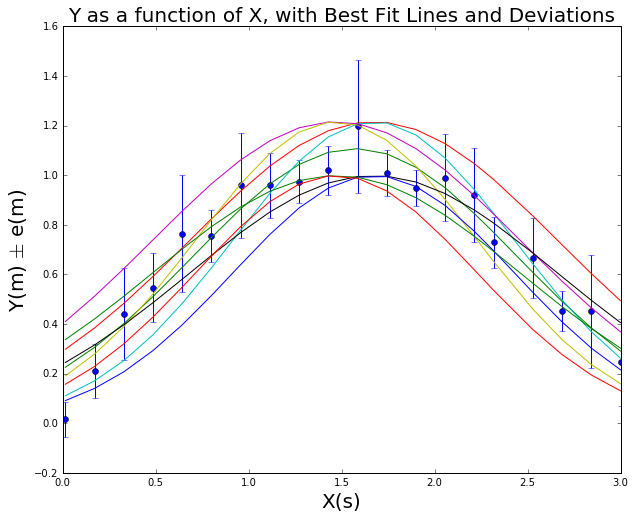

In [198]:
plt.figure(figsize=(10,8))
plt.errorbar(x,y, yerr=e, fmt='o')
plt.title("Y as a function of X, with Best Fit Lines and Deviations", fontsize='20')
plt.ylabel("Y(m) $\pm$ e(m)", fontsize='20')
plt.xlabel("X(s)", fontsize='20')
plt.plot(x, gaussianFit(x, fitParamsGauss[0], fitParamsGauss[1], fitParamsGauss[2]),\
        x, gaussianFit(x, fitParamsGauss[0]+sigmaGauss[0], fitParamsGauss[1]+sigmaGauss[1], fitParamsGauss[2]+sigmaGauss[2]),\
        x, gaussianFit(x, fitParamsGauss[0]+sigmaGauss[0], fitParamsGauss[1]+sigmaGauss[1], fitParamsGauss[2]-sigmaGauss[2]),\
        x, gaussianFit(x, fitParamsGauss[0]+sigmaGauss[0], fitParamsGauss[1]-sigmaGauss[1], fitParamsGauss[2]+sigmaGauss[2]),\
        x, gaussianFit(x, fitParamsGauss[0]+sigmaGauss[0], fitParamsGauss[1]-sigmaGauss[1], fitParamsGauss[2]-sigmaGauss[2]),\
        x, gaussianFit(x, fitParamsGauss[0]-sigmaGauss[0], fitParamsGauss[1]+sigmaGauss[1], fitParamsGauss[2]+sigmaGauss[2]),\
        x, gaussianFit(x, fitParamsGauss[0]-sigmaGauss[0], fitParamsGauss[1]+sigmaGauss[1], fitParamsGauss[2]-sigmaGauss[2]),\
        x, gaussianFit(x, fitParamsGauss[0]-sigmaGauss[0], fitParamsGauss[1]-sigmaGauss[1], fitParamsGauss[2]+sigmaGauss[2]),\
        x, gaussianFit(x, fitParamsGauss[0]-sigmaGauss[0], fitParamsGauss[1]-sigmaGauss[1], fitParamsGauss[2]-sigmaGauss[2]))
plt.show()

## 5. b)

In [203]:
fitParamsCos, fitCovariancesCos = curve_fit(cosFit, x, y)
print(fitParamsCos)
print(fitCovariancesCos)

sigmaCos = 3* np.sqrt([fitCovariancesCos[0,0], fitCovariancesCos[1,1], fitCovariancesCos[2,2]])
print(sigmaCos)

[ 1.07194362  0.95660201  1.57422704]
[[  5.11383113e-04   2.03370904e-04  -2.80417273e-05]
 [  2.03370904e-04   3.72330118e-04  -5.60074305e-05]
 [ -2.80417273e-05  -5.60074305e-05   4.29356322e-04]]
[ 0.06784134  0.05788757  0.06216275]


We use the funtion curve_fit again to find that the best fit constants for the trig funtion Y(x) are such that:

$y = 1.07 \cos(0.967(x-1.57))$

I also tried again to find a high and low, but was unable to find suitable lines.

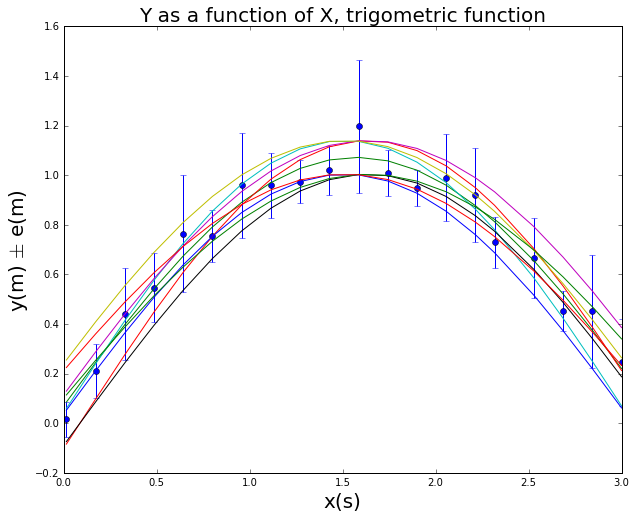

In [202]:
plt.figure(figsize=(10,8))
plt.errorbar(x, y, yerr=e, fmt = 'o')
plt.title("Y as a function of X, trigometric function", fontsize='20')
plt.ylabel("y(m) $\pm$ e(m)", fontsize='20')
plt.xlabel("x(s)", fontsize='20')
plt.plot(x, cosFit(x, fitParamsCos[0], fitParamsCos[1], fitParamsCos[2]),\
        x, cosFit(x, fitParamsCos[0]+sigmaCos[0], fitParamsCos[1]+sigmaCos[1], fitParamsCos[2]+sigmaCos[2]),\
        x, cosFit(x, fitParamsCos[0]+sigmaCos[0], fitParamsCos[1]+sigmaCos[1], fitParamsCos[2]-sigmaCos[2]),\
        x, cosFit(x, fitParamsCos[0]+sigmaCos[0], fitParamsCos[1]-sigmaCos[1], fitParamsCos[2]+sigmaCos[2]),\
        x, cosFit(x, fitParamsCos[0]+sigmaCos[0], fitParamsCos[1]-sigmaCos[1], fitParamsCos[2]-sigmaCos[2]),\
        x, cosFit(x, fitParamsCos[0]-sigmaCos[0], fitParamsCos[1]+sigmaCos[1], fitParamsCos[2]+sigmaCos[2]),\
        x, cosFit(x, fitParamsCos[0]-sigmaCos[0], fitParamsCos[1]+sigmaCos[1], fitParamsCos[2]-sigmaCos[2]),\
        x, cosFit(x, fitParamsCos[0]-sigmaCos[0], fitParamsCos[1]-sigmaCos[1], fitParamsCos[2]+sigmaCos[2]),\
        x, cosFit(x, fitParamsCos[0]-sigmaCos[0], fitParamsCos[1]-sigmaCos[1], fitParamsCos[2]-sigmaCos[2]))
plt.show()